# Impact of Discounted ARR on Churn Rate Across Product Tiers

# Importing Libaries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 

In [11]:
df_product = pd.read_csv("../staging/data_set/cleaned_product.csv")

# Convert date and extract year-month

In [12]:
df_product["score_date"] = pd.to_datetime(df_product["score_date"], errors="coerce")
df_product["year_month"] = df_product["score_date"].dt.to_period("M").astype(str)
df_product.sort_values(["id", "year_month"], inplace=True)

# Compute churn function

In [13]:
def compute_churn(df, col):
    prev = df.groupby("id")[col].shift(1)
    churn = ((prev == 1) & (df[col] == 0)).astype(int)
    return churn

# Compute churn for each product tier

In [14]:
df_product["team_churn"] = compute_churn(df_product, "team_plus")
df_product["pro_churn"] = compute_churn(df_product, "pro_plus")
df_product["ent_churn"] = compute_churn(df_product, "ent_plus")

# Group by discount_arr_usd and calculate average churn for each product tier

In [15]:
discount_churn = df_product.groupby("discount_arr_usd")[["team_churn", "pro_churn", "ent_churn"]].mean().reset_index()

# Visualization

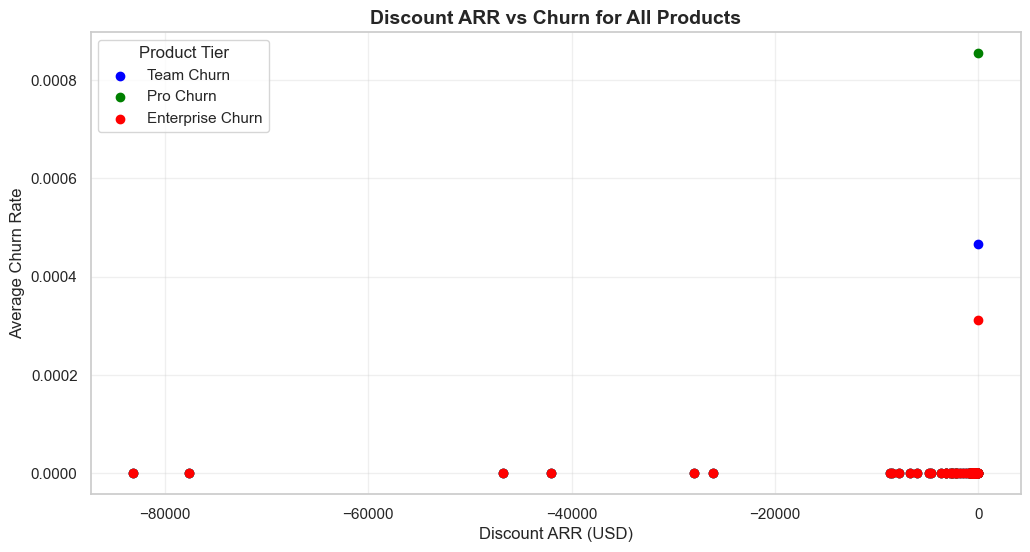

In [18]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

# Plot Discount ARR vs Churn with scatter points
plt.figure(figsize=(12, 6))
plt.scatter(discount_churn["discount_arr_usd"], discount_churn["team_churn"], label="Team Churn", color="blue")
plt.scatter(discount_churn["discount_arr_usd"], discount_churn["pro_churn"], label="Pro Churn", color="green")
plt.scatter(discount_churn["discount_arr_usd"], discount_churn["ent_churn"], label="Enterprise Churn", color="red")

# Improve title and labels
plt.title("Discount ARR vs Churn for All Products", fontsize=14, fontweight="bold")
plt.xlabel("Discount ARR (USD)", fontsize=12)
plt.ylabel("Average Churn Rate", fontsize=12)

# Add legend and grid
plt.legend(title="Product Tier")
plt.grid(alpha=0.3)

plt.show()